<a href="https://colab.research.google.com/github/chorltonm/fa-cup-upsets/blob/main/notebooks/models/logistic_regression_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Import general python libaries
import os
import json
import pandas as pd
import numpy as np
import importlib

# Google Cloud libraries
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import drive
from google.colab import userdata

# Scikit Learn libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import user defined python functions
import model_evaluation_functions
importlib.reload(model_evaluation_functions)
from model_evaluation_functions import create_model_results_df




In [46]:
# Mount Google Drive
drive.mount('/content/drive')

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/python_files')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Authentication credentials and keys

# Google Service Account

# Load the JSON key from local Google Collab file
key = json.load(open('/content/drive/MyDrive/service_account.json', 'r'))

# Authenticate using the loaded key
credentials = service_account.Credentials.from_service_account_info(key)

# Set up the BigQuery client with the credentials to project
client = bigquery.Client(credentials=credentials, project='birkbeck-msc-project-422917')

In [51]:
# Feature Data

fa_cup_raw_features = """
    select * from preparation_layer.view_fa_cup_round_3_features
"""

fa_cup_raw_features_df = client.query(fa_cup_raw_features).to_dataframe()
display(fa_cup_raw_features_df)


all_results_df = pd.DataFrame(columns=['metric_id', 'metric'])
display(all_results_df)


,arena_stadium_capacity,home_team_round_3_position,home_team_massey,home_team_colley,home_team_keener,home_team_trueskill,home_team_borda_count,home_team_local_kemeny_optimisation,home_lineup_strength,home_team_league_form,...,match_weather_data_hours_dew,match_weather_data_hours_precip,match_weather_data_hours_snow,match_weather_data_hours_snowdepth,match_weather_data_hours_windspeed,match_weather_data_hours_pressure,match_weather_data_hours_visibility,match_weather_data_hours_cloudcover,match_weather_data_hours_condition,target_variable
0,41837,1,1,1,12,1,1,1,NaN,0.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
1,41837,1,1,1,12,1,1,1,0.82,0.00,...,34.70,0.000,0.0,0.00,4.80,1036.70,2.05,95.90,Overcast,0
2,41837,1,1,1,12,1,1,1,0.88,0.00,...,47.00,0.000,0.0,0.00,2.10,1031.70,4.20,87.00,Partially cloudy,0
3,74879,1,1,1,12,1,1,1,0.82,0.00,...,71.20,0.000,NaN,0.00,7.65,1015.50,5.15,67.10,Partially cloudy,0
4,74879,2,3,7,4,6,5,5,NaN,0.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2150,63,62,59,57,52,62,62,NaN,NaN,...,41.30,0.004,0.0,0.04,13.65,1022.25,11.80,94.85,"Overcast Rain, Partially cloudy",0
301,<NA>,64,58,64,53,63,64,64,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
302,9527,64,58,64,53,63,64,64,0.90,0.22,...,37.15,0.000,0.0,0.00,14.45,1012.75,9.00,94.25,Overcast Partially cloudy,1
303,6064,64,58,64,53,63,64,64,0.15,NaN,...,41.45,0.000,0.0,0.00,6.35,1036.35,15.15,98.65,Overcast,0


,metric_id,metric


Standard LogisticRegression round_3_position
Fold 1 Accuracy: 0.721
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.721
Fold 4 Accuracy: 0.705
Fold 5 Accuracy: 0.738
Average Accuracy: 0.715


,metric_id,metric,Standard LogisticRegression round_3_position
0,1,Cross-validation Accuracy,0.715
1,2,Overall Accuracy,0.715
2,3,Confusion Matrix - True Negative (Class 0),213.000
3,4,Confusion Matrix - False Positive (Class 1),10.000
4,5,Confusion Matrix - False Negative (Class 0),77.000
5,6,Confusion Matrix - True Positive (Class 1),5.000
6,7,Precision (Class 0),0.734
7,8,Recall (Class 0),0.955
8,9,F1-score (Class 0),0.830
9,10,Precision (Class 1),0.333


Standard LogisticRegression massey
Fold 1 Accuracy: 0.754
Fold 2 Accuracy: 0.738
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.721
Fold 5 Accuracy: 0.738
Average Accuracy: 0.738


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey
0,1,Cross-validation Accuracy,0.715,0.738
1,2,Overall Accuracy,0.715,0.738
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000
6,7,Precision (Class 0),0.734,0.747
7,8,Recall (Class 0),0.955,0.969
8,9,F1-score (Class 0),0.830,0.844
9,10,Precision (Class 1),0.333,0.562


Standard LogisticRegression colley
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.721
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.705
Average Accuracy: 0.721


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley
0,1,Cross-validation Accuracy,0.715,0.738,0.721
1,2,Overall Accuracy,0.715,0.738,0.721
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000
6,7,Precision (Class 0),0.734,0.747,0.741
7,8,Recall (Class 0),0.955,0.969,0.951
8,9,F1-score (Class 0),0.830,0.844,0.833
9,10,Precision (Class 1),0.333,0.562,0.421


Standard LogisticRegression keener
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.738
Fold 3 Accuracy: 0.705
Fold 4 Accuracy: 0.770
Fold 5 Accuracy: 0.721
Average Accuracy: 0.734


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734
1,2,Overall Accuracy,0.715,0.738,0.721,0.734
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750
7,8,Recall (Class 0),0.955,0.969,0.951,0.955
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840
9,10,Precision (Class 1),0.333,0.562,0.421,0.524


Standard LogisticRegression trueskill
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.721
Fold 3 Accuracy: 0.656
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.705
Average Accuracy: 0.711


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364


Standard LogisticRegression borda_count
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.721
Fold 3 Accuracy: 0.705
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.721
Average Accuracy: 0.725


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450


Standard LogisticRegression local_kemeny_optimisation
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.721
Fold 3 Accuracy: 0.705
Fold 4 Accuracy: 0.738
Fold 5 Accuracy: 0.721
Average Accuracy: 0.725


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450


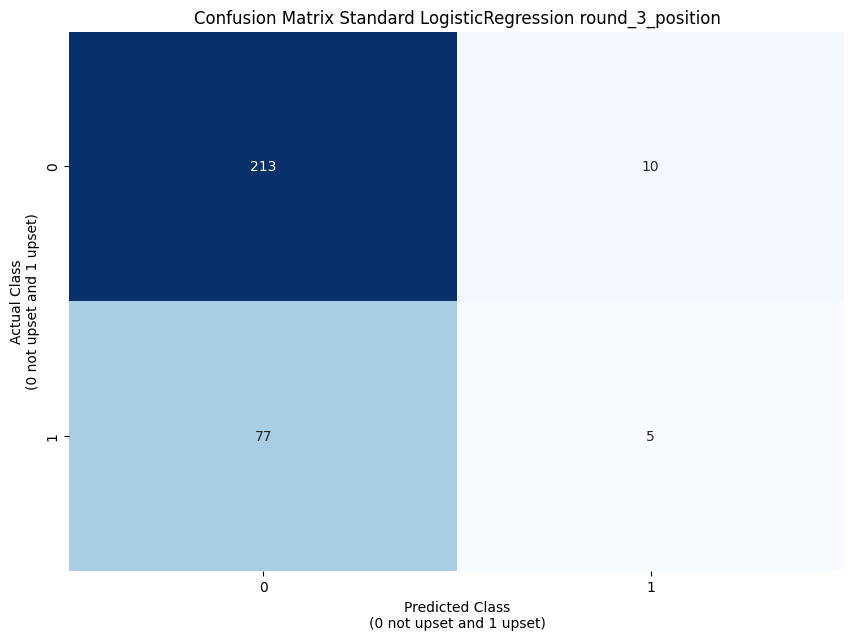

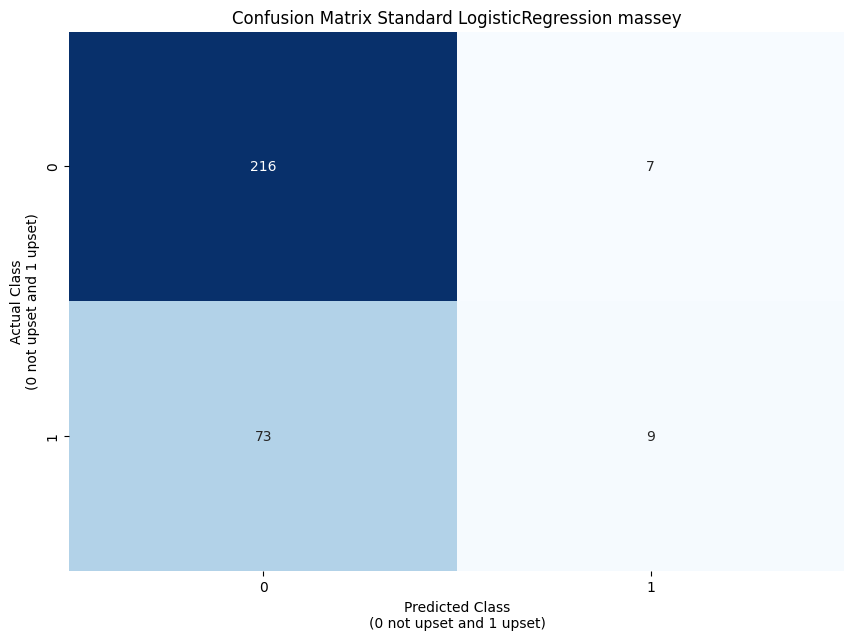

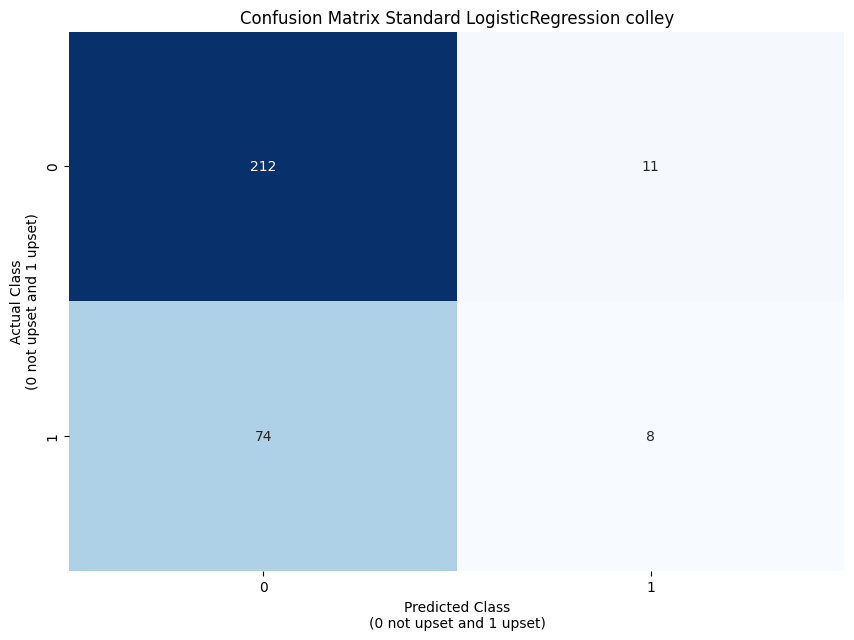

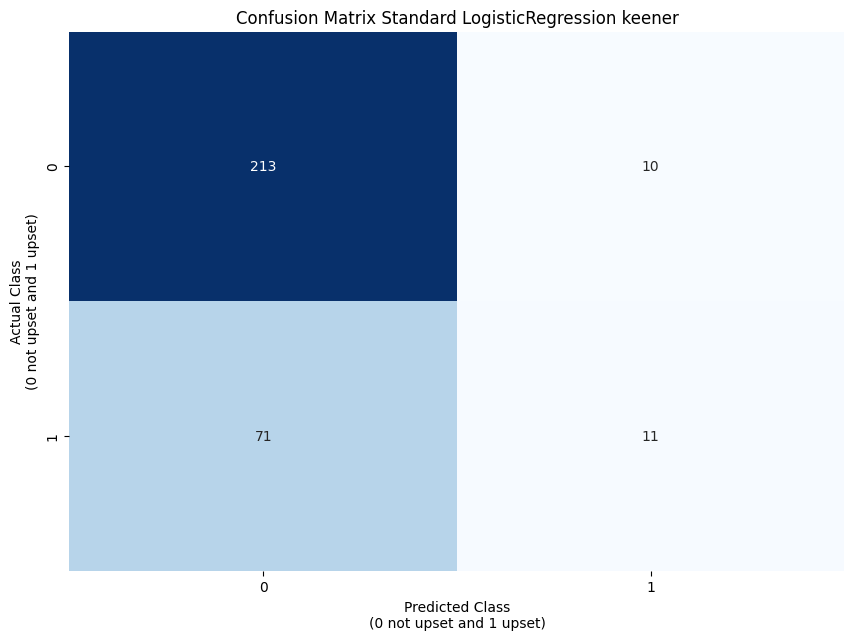

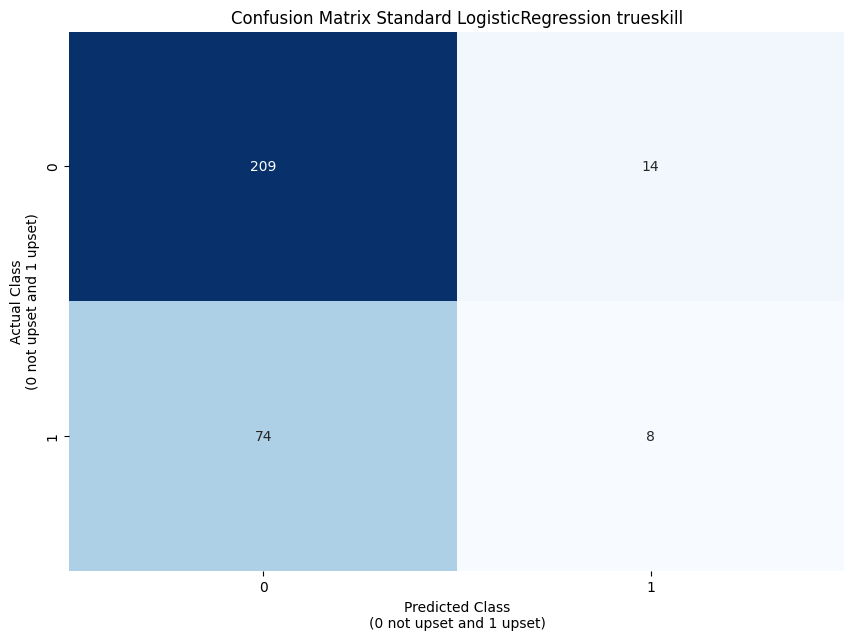

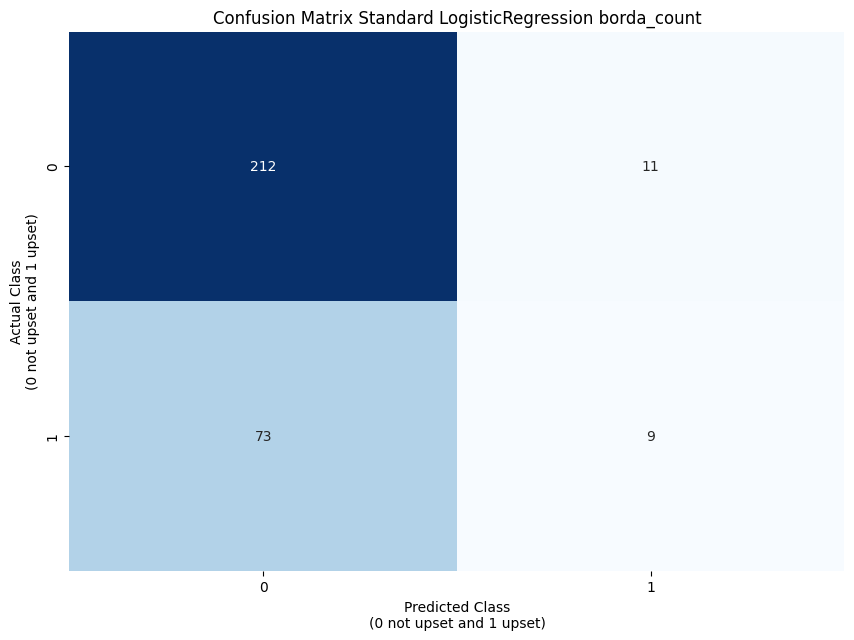

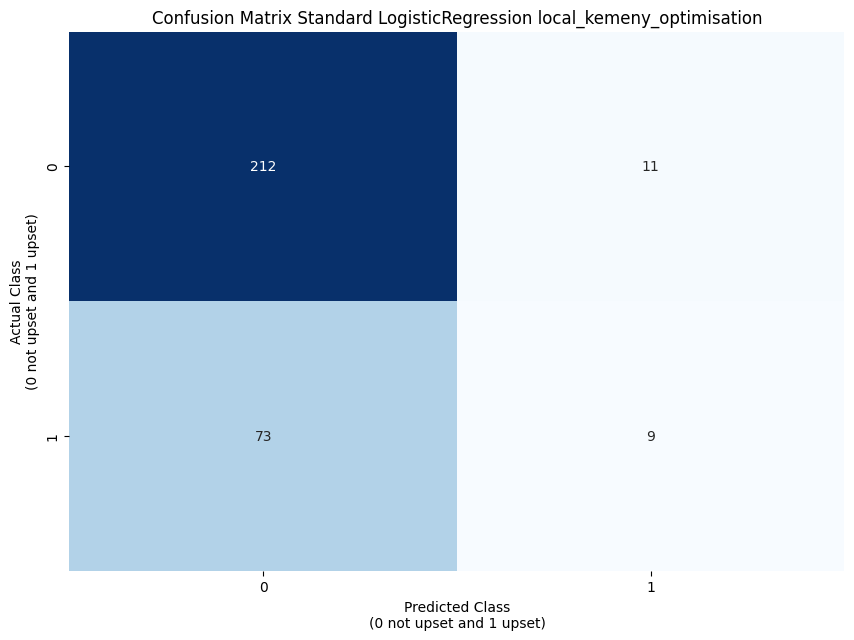

In [49]:
# Standard, no weights
model_name = "Standard LogisticRegression"
# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Update preprocessor with current features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
        ], verbose_feature_names_out=False)


    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=100))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df = all_results_df.merge(results_df, on=['metric_id', 'metric'], how='outer')
    display(all_results_df)


Weighted LogisticRegression round_3_position
Fold 1 Accuracy: 0.557
Fold 2 Accuracy: 0.525
Fold 3 Accuracy: 0.590
Fold 4 Accuracy: 0.639
Fold 5 Accuracy: 0.574
Average Accuracy: 0.577


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation,Weighted LogisticRegression round_3_position
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000,135.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000,88.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000,41.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000,41.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744,0.767
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951,0.605
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835,0.677
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450,0.318


Weighted LogisticRegression massey
Fold 1 Accuracy: 0.590
Fold 2 Accuracy: 0.541
Fold 3 Accuracy: 0.574
Fold 4 Accuracy: 0.590
Fold 5 Accuracy: 0.525
Average Accuracy: 0.564


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation,Weighted LogisticRegression round_3_position,Weighted LogisticRegression massey
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000,135.000,134.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000,88.000,89.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000,41.000,44.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000,41.000,38.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744,0.767,0.753
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951,0.605,0.601
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835,0.677,0.668
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450,0.318,0.299


Weighted LogisticRegression colley
Fold 1 Accuracy: 0.574
Fold 2 Accuracy: 0.557
Fold 3 Accuracy: 0.607
Fold 4 Accuracy: 0.623
Fold 5 Accuracy: 0.574
Average Accuracy: 0.587


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation,Weighted LogisticRegression round_3_position,Weighted LogisticRegression massey,Weighted LogisticRegression colley
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000,135.000,134.000,138.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000,88.000,89.000,85.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000,41.000,44.000,41.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000,41.000,38.000,41.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744,0.767,0.753,0.771
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951,0.605,0.601,0.619
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835,0.677,0.668,0.687
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450,0.318,0.299,0.325


Weighted LogisticRegression keener
Fold 1 Accuracy: 0.590
Fold 2 Accuracy: 0.525
Fold 3 Accuracy: 0.590
Fold 4 Accuracy: 0.607
Fold 5 Accuracy: 0.541
Average Accuracy: 0.570


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation,Weighted LogisticRegression round_3_position,Weighted LogisticRegression massey,Weighted LogisticRegression colley,Weighted LogisticRegression keener
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000,135.000,134.000,138.000,133.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000,88.000,89.000,85.000,90.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000,41.000,44.000,41.000,41.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000,41.000,38.000,41.000,41.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744,0.767,0.753,0.771,0.764
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951,0.605,0.601,0.619,0.596
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835,0.677,0.668,0.687,0.670
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450,0.318,0.299,0.325,0.313


Weighted LogisticRegression trueskill
Fold 1 Accuracy: 0.590
Fold 2 Accuracy: 0.574
Fold 3 Accuracy: 0.590
Fold 4 Accuracy: 0.607
Fold 5 Accuracy: 0.525
Average Accuracy: 0.577


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation,Weighted LogisticRegression round_3_position,Weighted LogisticRegression massey,Weighted LogisticRegression colley,Weighted LogisticRegression keener,Weighted LogisticRegression trueskill
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570,0.577
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570,0.577
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000,135.000,134.000,138.000,133.000,136.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000,88.000,89.000,85.000,90.000,87.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000,41.000,44.000,41.000,41.000,42.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000,41.000,38.000,41.000,41.000,40.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744,0.767,0.753,0.771,0.764,0.764
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951,0.605,0.601,0.619,0.596,0.610
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835,0.677,0.668,0.687,0.670,0.678
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450,0.318,0.299,0.325,0.313,0.315


Weighted LogisticRegression borda_count
Fold 1 Accuracy: 0.590
Fold 2 Accuracy: 0.525
Fold 3 Accuracy: 0.590
Fold 4 Accuracy: 0.623
Fold 5 Accuracy: 0.557
Average Accuracy: 0.577


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation,Weighted LogisticRegression round_3_position,Weighted LogisticRegression massey,Weighted LogisticRegression colley,Weighted LogisticRegression keener,Weighted LogisticRegression trueskill,Weighted LogisticRegression borda_count
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570,0.577,0.577
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570,0.577,0.577
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000,135.000,134.000,138.000,133.000,136.000,136.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000,88.000,89.000,85.000,90.000,87.000,87.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000,41.000,44.000,41.000,41.000,42.000,42.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000,41.000,38.000,41.000,41.000,40.000,40.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744,0.767,0.753,0.771,0.764,0.764,0.764
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951,0.605,0.601,0.619,0.596,0.610,0.610
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835,0.677,0.668,0.687,0.670,0.678,0.678
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450,0.318,0.299,0.325,0.313,0.315,0.315


Weighted LogisticRegression local_kemeny_optimisation
Fold 1 Accuracy: 0.590
Fold 2 Accuracy: 0.525
Fold 3 Accuracy: 0.574
Fold 4 Accuracy: 0.623
Fold 5 Accuracy: 0.557
Average Accuracy: 0.574


,metric_id,metric,Standard LogisticRegression round_3_position,Standard LogisticRegression massey,Standard LogisticRegression colley,Standard LogisticRegression keener,Standard LogisticRegression trueskill,Standard LogisticRegression borda_count,Standard LogisticRegression local_kemeny_optimisation,Weighted LogisticRegression round_3_position,Weighted LogisticRegression massey,Weighted LogisticRegression colley,Weighted LogisticRegression keener,Weighted LogisticRegression trueskill,Weighted LogisticRegression borda_count,Weighted LogisticRegression local_kemeny_optimisation
0,1,Cross-validation Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570,0.577,0.577,0.574
1,2,Overall Accuracy,0.715,0.738,0.721,0.734,0.711,0.725,0.725,0.577,0.564,0.587,0.570,0.577,0.577,0.574
2,3,Confusion Matrix - True Negative (Class 0),213.000,216.000,212.000,213.000,209.000,212.000,212.000,135.000,134.000,138.000,133.000,136.000,136.000,135.000
3,4,Confusion Matrix - False Positive (Class 1),10.000,7.000,11.000,10.000,14.000,11.000,11.000,88.000,89.000,85.000,90.000,87.000,87.000,88.000
4,5,Confusion Matrix - False Negative (Class 0),77.000,73.000,74.000,71.000,74.000,73.000,73.000,41.000,44.000,41.000,41.000,42.000,42.000,42.000
5,6,Confusion Matrix - True Positive (Class 1),5.000,9.000,8.000,11.000,8.000,9.000,9.000,41.000,38.000,41.000,41.000,40.000,40.000,40.000
6,7,Precision (Class 0),0.734,0.747,0.741,0.750,0.739,0.744,0.744,0.767,0.753,0.771,0.764,0.764,0.764,0.763
7,8,Recall (Class 0),0.955,0.969,0.951,0.955,0.937,0.951,0.951,0.605,0.601,0.619,0.596,0.610,0.610,0.605
8,9,F1-score (Class 0),0.830,0.844,0.833,0.840,0.826,0.835,0.835,0.677,0.668,0.687,0.670,0.678,0.678,0.675
9,10,Precision (Class 1),0.333,0.562,0.421,0.524,0.364,0.450,0.450,0.318,0.299,0.325,0.313,0.315,0.315,0.312


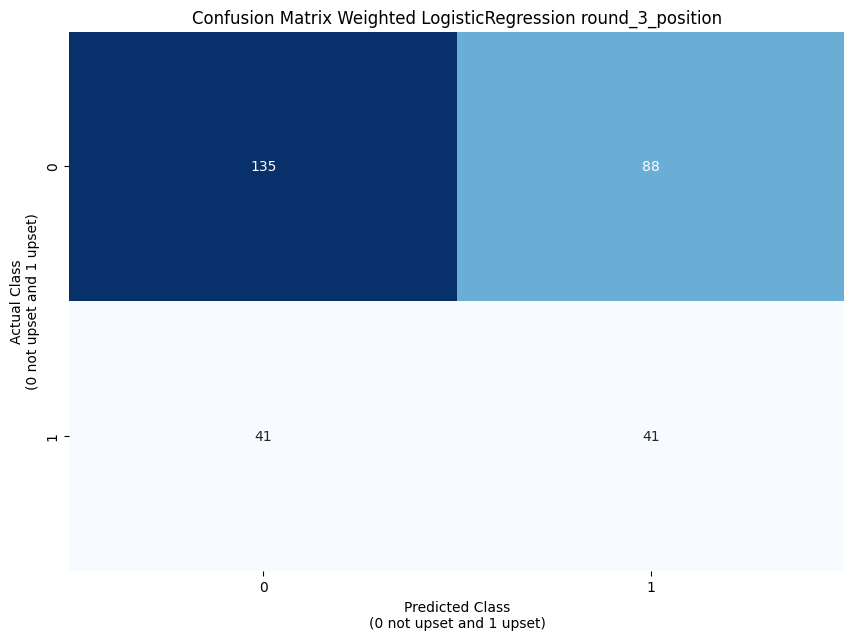

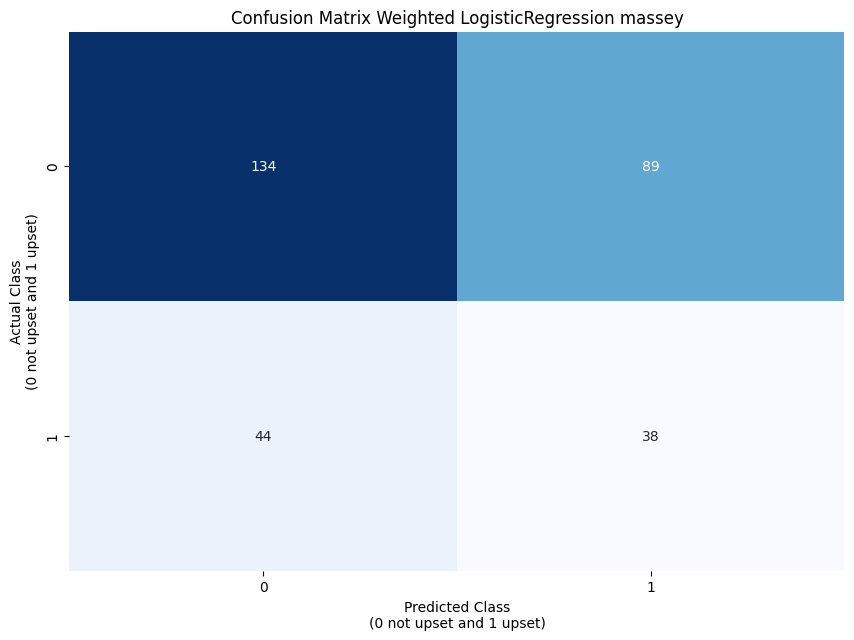

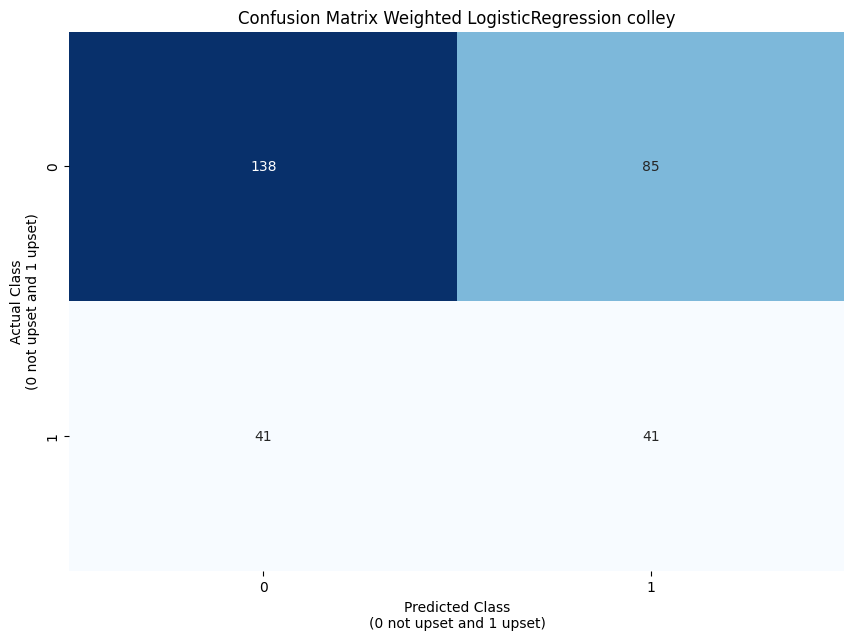

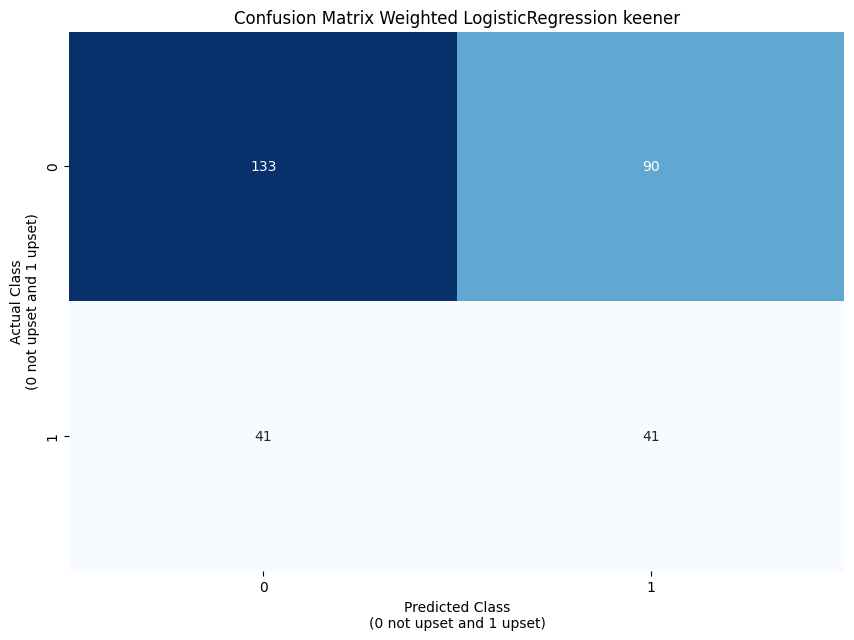

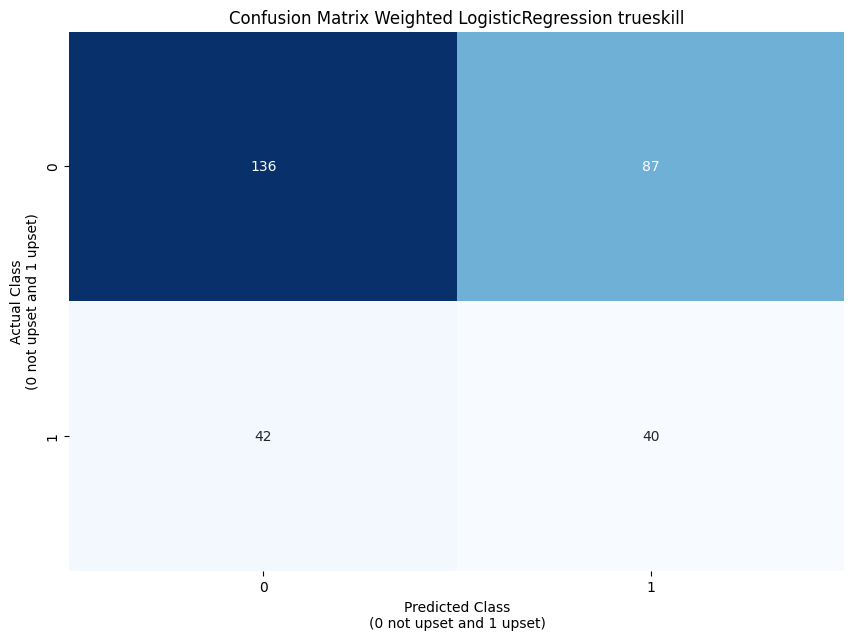

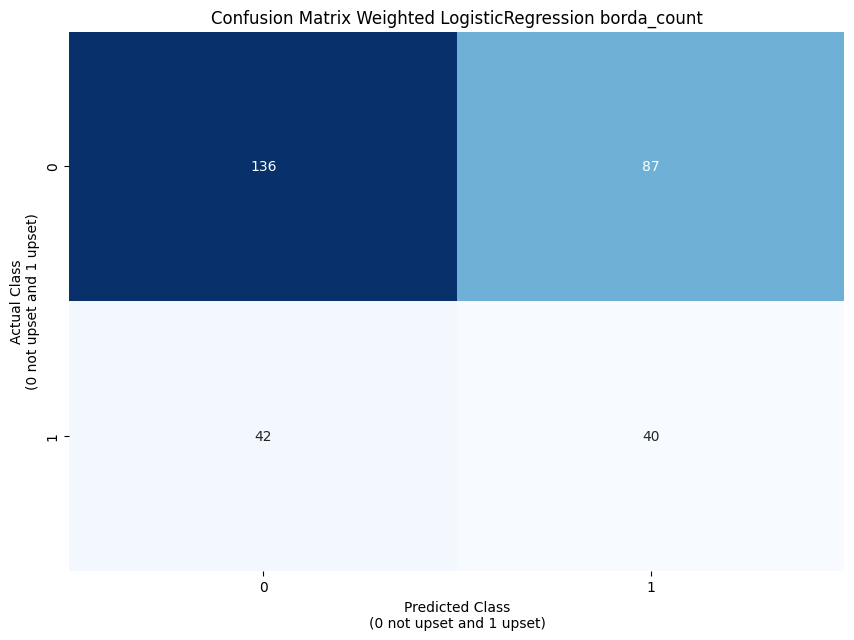

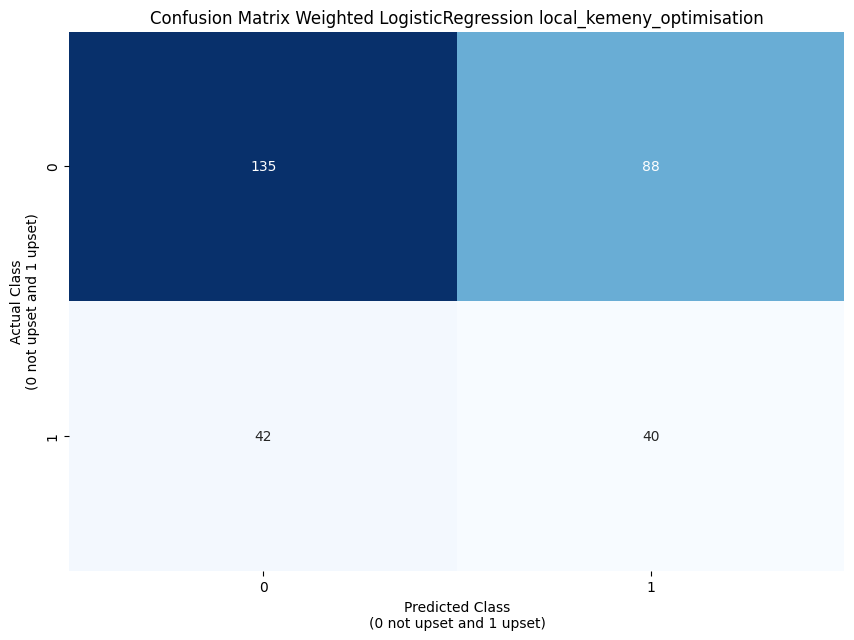

In [50]:
# Weighted Logistc Regression
model_name = "Weighted LogisticRegression"

# Function to calculate weights
def calculate_weights(y):
    class_counts = y.value_counts()
    total_samples = len(y)
    return {class_label: int(round((1 - (count / total_samples)) * 100))
            for class_label, count in class_counts.items()}

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Update preprocessor with current features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
        ], verbose_feature_names_out=False)

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Calculate weights using only training data
        weights = calculate_weights(y_train)

        # Create pipeline
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(class_weight=weights,max_iter=1000))
        ])


        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df = all_results_df.merge(results_df, on=['metric_id', 'metric'], how='outer')
    display(all_results_df)


In [ ]:
# MCP Neural Network
model_name = "MLP Classifier Neural Network"

# Define the ranking systems
ranking_systems = ['round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    # Prepare the feature set for the current ranking system
    current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
    X = fa_cup_raw_features_df[current_features]
    y = fa_cup_raw_features_df['target_variable']

    # Update preprocessor with current features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
            ('rank', ranking_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
        ], verbose_feature_names_out=False)


    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', MLPClassifier(hidden_layer_sizes=(10), max_iter=100, random_state=random_state))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using your existing function
    results_df= create_model_results_df(all_y_true, all_y_pred, fold_accuracies, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df = all_results_df.merge(results_df, on=['metric_id', 'metric'], how='outer')
    display(all_results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 1 Accuracy: 0.738


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 2 Accuracy: 0.721


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 3 Accuracy: 0.754


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Fold 4 Accuracy: 0.721
Fold 5 Accuracy: 0.787
Average Accuracy: 0.744


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,metric,Standard LogisticRegression,Weighted LogisticRegression,Neural Network
0,Cross-validation Accuracy,0.738,0.564,0.744
1,Overall Accuracy,0.738,0.564,0.744
2,Confusion Matrix - True Negative (Class 0),214.000,130.000,197.000
3,Confusion Matrix - False Positive (Class 1),9.000,93.000,26.000
4,Confusion Matrix - False Negative (Class 0),71.000,40.000,52.000
5,Confusion Matrix - True Positive (Class 1),11.000,42.000,30.000
6,Precision (Class 0),0.751,0.765,0.791
7,Recall (Class 0),0.960,0.583,0.883
8,F1-score (Class 0),0.843,0.662,0.835
9,Precision (Class 1),0.550,0.311,0.536


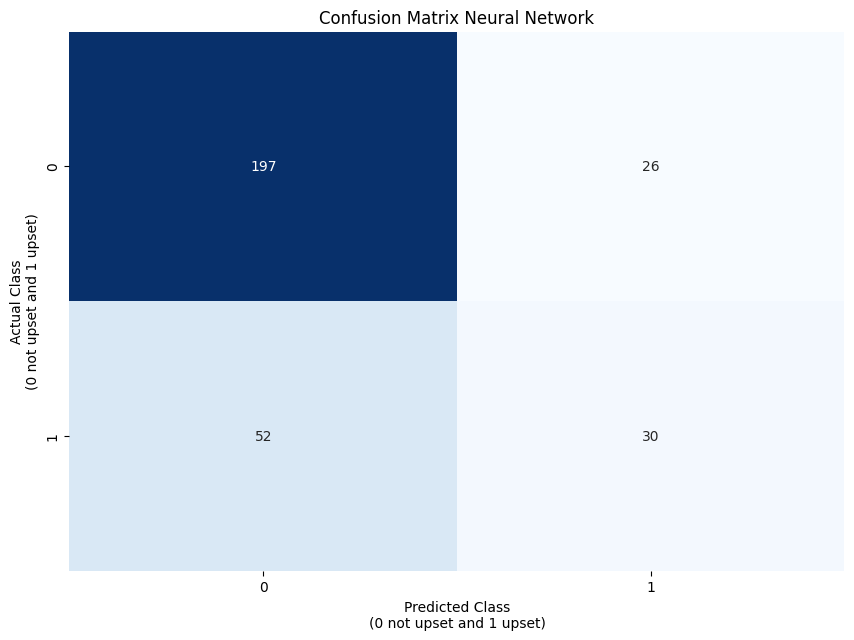

In [ ]:
# Import user defined python functions
import model_evaluation_functions
importlib.reload(model_evaluation_functions)
from model_evaluation_functions import create_model_results_df

#Logistic Regresssion

# MCP Neural Network
model_name = "MCP Classifier Neural Network"
all_y_true, all_y_pred, accuracies, model_name = run_neural_network(df_encoded, 'target_variable')
results_df_mcp_nn = create_model_results_df(all_y_true, all_y_pred, accuracies, model_name)

# Combine results dataframes
combined_results = combined_results_lr.merge(results_df_mcp_nn, on='metric')
display(combined_results)

In [ ]:
def run_neural_network(df, target_column, hidden_layer_sizes=(10), features_to_drop=None, n_splits=5, random_state=42):

    # Create the StratifiedKFold object
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # Initialize lists to store results
    accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []

    # Prepare the feature set
    X = df.drop(target_column, axis=1)
    if features_to_drop:
        X = X.drop(features_to_drop, axis=1)
    y = df[target_column]

    # Perform cross-validation
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        # Split the data
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Train the model
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                              max_iter=1000,
                              random_state=random_state)

        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_val)

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    return all_y_true, all_y_pred, accuracies, "Neural Network"
